# Figsetup
Using 20200408 Chou's data, unit2.<br>
shortcaption: Overlaying figures of normalized-TLPI from the LC model with different values of parameters in SG <br>
label: TLPI_SG

In [1]:
filename = 'TLPI_SG'

# Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
# from Spike_Generation import Spike_Time_Generater
# from Spike_Generation import NL
from Spike_Generation import SG
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA
from NGD_TK_AS import NGD2L_TK_AS
from NGD_TK_AS import ParaTrans

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb
importing Jupyter notebook from NGD_TK_AS.ipynb


In [4]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [5]:
def cm2inch(value):
    return value/2.54

# Load Experimental data

In [6]:
Fc_list = [2]
filenames = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff='+str(Fc)+'_sort_unit2' for Fc in Fc_list]

dt = 0.01
x_list, T_list, rstate_list = expSnR(filenames, dt, 'LED', [])

In [7]:
# Dt = 0.01
v_list = [np.append(0, np.diff(x))/dt  for x in x_list]
tv_list = [ndimage.gaussian_filter1d(x, order=1, sigma=1)/dt  for x in x_list]

In [8]:
#assign states
state_num = 6
xstate_list = [EqualState(x, state_num)[0] for x in x_list]
vstate_list = [EqualState(v, state_num)[0] for v in v_list]
tvstate_list = [EqualState(tv, state_num)[0] for tv in tv_list]

In [9]:
Lambda = 0.45
i = 0
r = -( (1-Lambda)*x_list[i]+Lambda*v_list[i] )

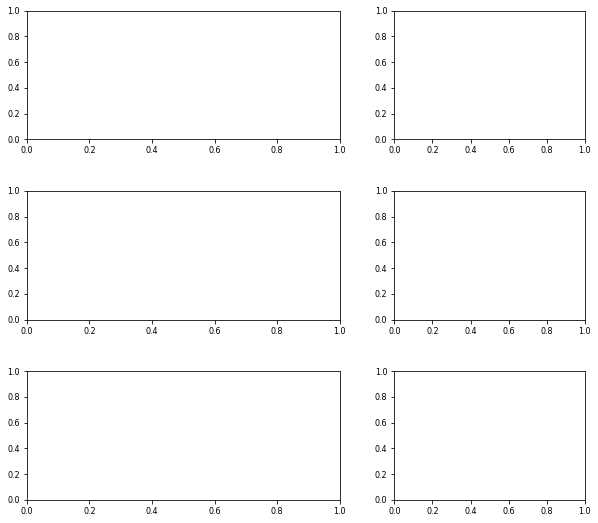

In [10]:
plt.rcParams["font.size"] = 10
plt.rcParams['xtick.labelsize'] =  8
plt.rcParams['ytick.labelsize'] =  8

fig = plt.figure()
fig.set_size_inches(10, 9)
axgird = fig.add_gridspec(3, 5, wspace=0.8, hspace=0.4)
axa = plt.subplot(axgird[0,:3])
axb = plt.subplot(axgird[0,3:])
axc = plt.subplot(axgird[1,:3])
axd = plt.subplot(axgird[1,3:])
axe = plt.subplot(axgird[2,:3])
axf = plt.subplot(axgird[2,3:])

# r_mean 

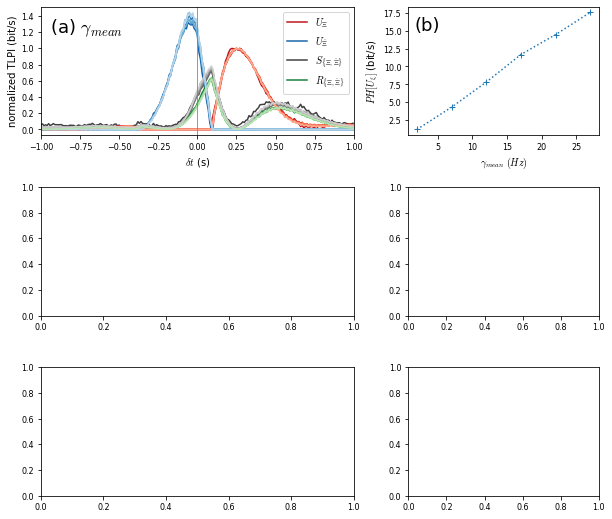

In [11]:
UxH = []
r_mean_list = np.arange(2,30,5)
# r_mean_list = [2,30]
c = 0
for rrate in r_mean_list:
    ystate = SG(r,dt,0,rrate,10)
    # -----------------------------------------------------------------------------------------------------
    window = [-1,1] # second
    Information_list = [0]
    
    timeshift, Information_list[i] = PIfunc(ystate, xstate_list[i], tvstate_list[i], dt, window)
    UxH.append(max(Information_list[i][('Beer','UIx')]))
    # -----------------------------------------------------------------------------------------------------
    axa.plot(timeshift,Information_list[i][('Beer','UIx')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Reds( 0.8-c*0.6/len(r_mean_list) ))
    axa.plot(timeshift,Information_list[i][('Beer','UIv')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Blues( 0.8-c*0.6/len(r_mean_list) ))
    axa.plot(timeshift,Information_list[i][('Beer','Syn')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Greys( 0.8-c*0.6/len(r_mean_list) ))
    axa.plot(timeshift,Information_list[i][('Beer','Red')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Greens( 0.8-c*0.6/len(r_mean_list) ))
    c+=1
axa.set_xlabel(r'$\delta t$ (s)')
axa.set_ylabel('normalized TLPI (bit/s)')
fig.text(0.03, 0.92, r'(a) $\gamma_{mean} $', ha='left', va='top', transform=axa.transAxes, fontsize = 18)
axa.legend( (r'$U_\Xi$', r'$U_\dot\Xi$', r'$S_{\{\Xi,\dot\Xi\}}$', r'$R_{\{\Xi,\dot\Xi\}}$'), loc='upper right')
axa.axvline(0, c = 'gray', linewidth = 1, alpha = 0.8)
axa.set_xlim(window)
#--------------------------------------------------------------------------------------------------------------------------------------
axb.plot(r_mean_list, UxH, '+:')
axb.set_ylabel( r'$PH[U_\xi]$ (bit/s)')
axb.set_xlabel( r'$\gamma_{mean}~(Hz)$')
fig.text(0.03, 0.92, '(b)', ha='left', va='top', transform=axb.transAxes, fontsize = 18)
fig

# \theta

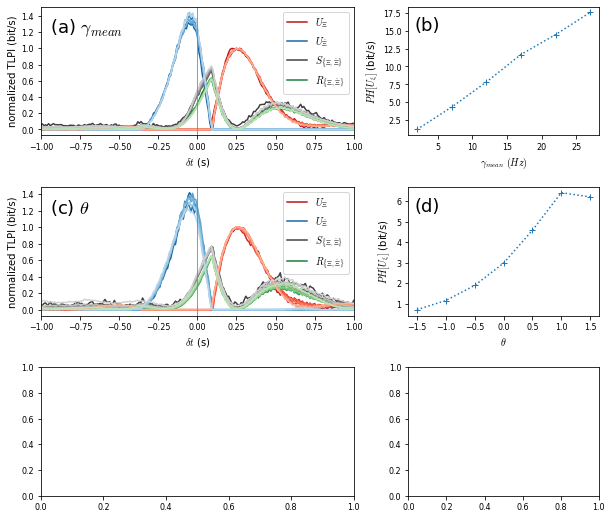

In [12]:
UxH = []
theta_star_list = np.linspace(-1.5,1.5,7)
# theta_star_list = [-1.5, 0, 1.5]
c = 0
for theta_star in theta_star_list:
    ystate = SG(r,dt,np.mean(r)+theta_star*np.std(r),5,10)
    # -----------------------------------------------------------------------------------------------------
    window = [-1,1] # second
    Information_list = [0]
    
    timeshift, Information_list[i] = PIfunc(ystate, xstate_list[i], tvstate_list[i], dt, window)
    UxH.append(max(Information_list[i][('Beer','UIx')]))
    # -----------------------------------------------------------------------------------------------------
    axc.plot(timeshift,Information_list[i][('Beer','UIx')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Reds( 0.8-c*0.6/len(theta_star_list) ))
    axc.plot(timeshift,Information_list[i][('Beer','UIv')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Blues( 0.8-c*0.6/len(theta_star_list) ))
    axc.plot(timeshift,Information_list[i][('Beer','Syn')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Greys( 0.8-c*0.6/len(theta_star_list) ))
    axc.plot(timeshift,Information_list[i][('Beer','Red')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Greens( 0.8-c*0.6/len(theta_star_list) ))
    c+=1
axc.set_xlabel(r'$\delta t$ (s)')
axc.set_ylabel('normalized TLPI (bit/s)')
fig.text(0.03, 0.92, r'(c) $\theta$', ha='left', va='top', transform=axc.transAxes, fontsize = 18)
axc.legend( (r'$U_\Xi$', r'$U_\dot\Xi$', r'$S_{\{\Xi,\dot\Xi\}}$', r'$R_{\{\Xi,\dot\Xi\}}$'), loc='upper right')
axc.axvline(0, c = 'gray', linewidth = 1, alpha = 0.8)
axc.set_xlim(window)
#--------------------------------------------------------------------------------------------------------------------------------------
axd.plot(theta_star_list, UxH, '+:')
axd.set_ylabel( r'$PH[U_\xi]$ (bit/s)')
axd.set_xlabel( r'$\theta$')
fig.text(0.03, 0.92, '(d)', ha='left', va='top', transform=axd.transAxes, fontsize = 18)
fig

# \Gamma

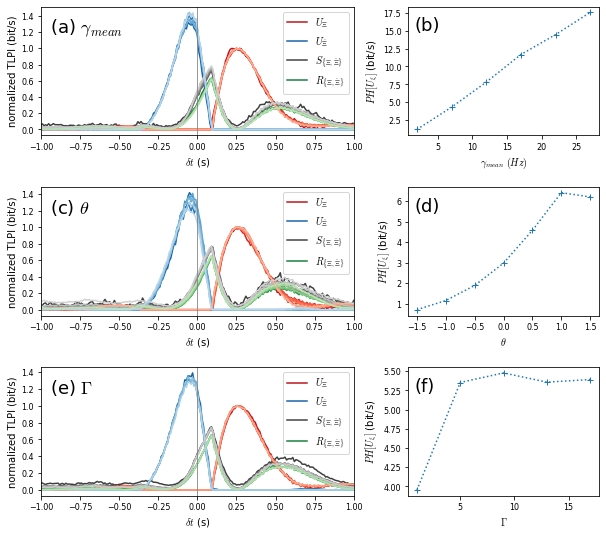

In [13]:
UxH = []
Gamma_list = np.arange(1,20,4)
# Gamma_list = [1,20]
c = 0
for Gamma in Gamma_list:
    ystate = SG(r,dt,1,5,Gamma)
    # -----------------------------------------------------------------------------------------------------
    window = [-1,1] # second
    Information_list = [0]
    
    timeshift, Information_list[i] = PIfunc(ystate, xstate_list[i], tvstate_list[i], dt, window)
    UxH.append(max(Information_list[i][('Beer','UIx')]))
    # -----------------------------------------------------------------------------------------------------
    axe.plot(timeshift,Information_list[i][('Beer','UIx')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Reds( 0.8-c*0.6/len(Gamma_list) ))
    axe.plot(timeshift,Information_list[i][('Beer','UIv')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Blues( 0.8-c*0.6/len(Gamma_list) ))
    axe.plot(timeshift,Information_list[i][('Beer','Syn')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Greys( 0.8-c*0.6/len(Gamma_list) ))
    axe.plot(timeshift,Information_list[i][('Beer','Red')]/max(Information_list[i][('Beer','UIx')]),
             c = plt.cm.Greens( 0.8-c*0.6/len(Gamma_list) ))
    c+=1
axe.set_xlabel(r'$\delta t$ (s)')
axe.set_ylabel('normalized TLPI (bit/s)')
fig.text(0.03, 0.92, r'(e) $\Gamma$', ha='left', va='top', transform=axe.transAxes, fontsize = 18)
axe.legend( (r'$U_\Xi$', r'$U_\dot\Xi$', r'$S_{\{\Xi,\dot\Xi\}}$', r'$R_{\{\Xi,\dot\Xi\}}$'), loc='upper right')
axe.axvline(0, c = 'gray', linewidth = 1, alpha = 0.8)
axe.set_xlim(window)
#--------------------------------------------------------------------------------------------------------------------------------------
axf.plot(Gamma_list, UxH, '+:')
axf.set_ylabel( r'$PH[U_\xi]$ (bit/s)')
axf.set_xlabel( r'$\Gamma$')
fig.text(0.03, 0.92, '(f)', ha='left', va='top', transform=axf.transAxes, fontsize = 18)
fig

# Final Fig.

In [14]:
# fig = plt.gcf()
fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\A\\'+filename+'.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)